In [1]:
import numpy as np
import pandas as pd
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [3]:
data=pd.read_excel('hotel_reviews.xlsx')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [4]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import STOPWORDS
import re

In [5]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
data.duplicated().sum() #no duplicates in given dataset

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


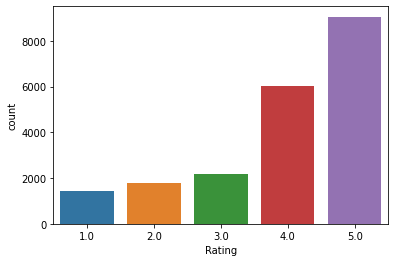

In [8]:
sns.countplot(data['Rating'])

In [9]:
data['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [10]:
percent={1421/20491,
6039/20491,2184/20491,1793/20491,9054/20491}

In [11]:
sorted(percent,reverse=True)

[0.44185252061880825,
 0.2947147528183105,
 0.10658337806842028,
 0.08750183007173881,
 0.06934751842272217]

In [12]:
data['Lenght']=data['Review'].apply(len)
data

,Review,Rating,Lenght
0,nice hotel expensive parking got good deal sta...,4.0,593
1,ok nothing special charge diamond member hilto...,2.0,1689
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427
3,"unique, great stay, wonderful time hotel monac...",5.0,600
4,"great stay great stay, went seahawk game aweso...",5.0,1281
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733
20487,great location price view hotel great quick pl...,4.0,306
20488,"ok just looks nice modern outside, desk staff ...",2.0,443
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557


In [13]:
data['Lenght'].describe()

count    20491.000000
mean       725.245571
std        689.933070
min         44.000000
25%        339.000000
50%        537.000000
75%        859.000000
max      13501.000000
Name: Lenght, dtype: float64

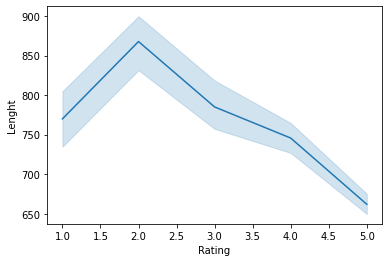

In [14]:
sns.lineplot(x='Rating',y='Lenght',data=data)

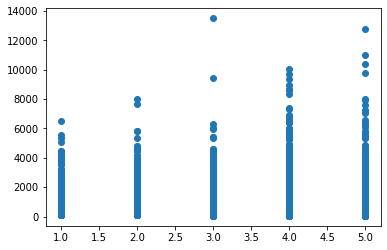

In [15]:
plt.scatter(x='Rating',y='Lenght',data=data)

In [16]:
df5=data[data['Rating']==5]
df5

,Review,Rating,Lenght
3,"unique, great stay, wonderful time hotel monac...",5.0,600
4,"great stay great stay, went seahawk game aweso...",5.0,1281
5,love monaco staff husband stayed hotel crazy w...,5.0,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5.0,748
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0,419
...,...,...,...
20473,best best reason affordable better hotels city...,5.0,152
20476,"night not trust not disappointed stay hotel, s...",5.0,1082
20480,great play stay stay loyal inn package deal ha...,5.0,256
20482,great choice wife chose best western quite bit...,5.0,716


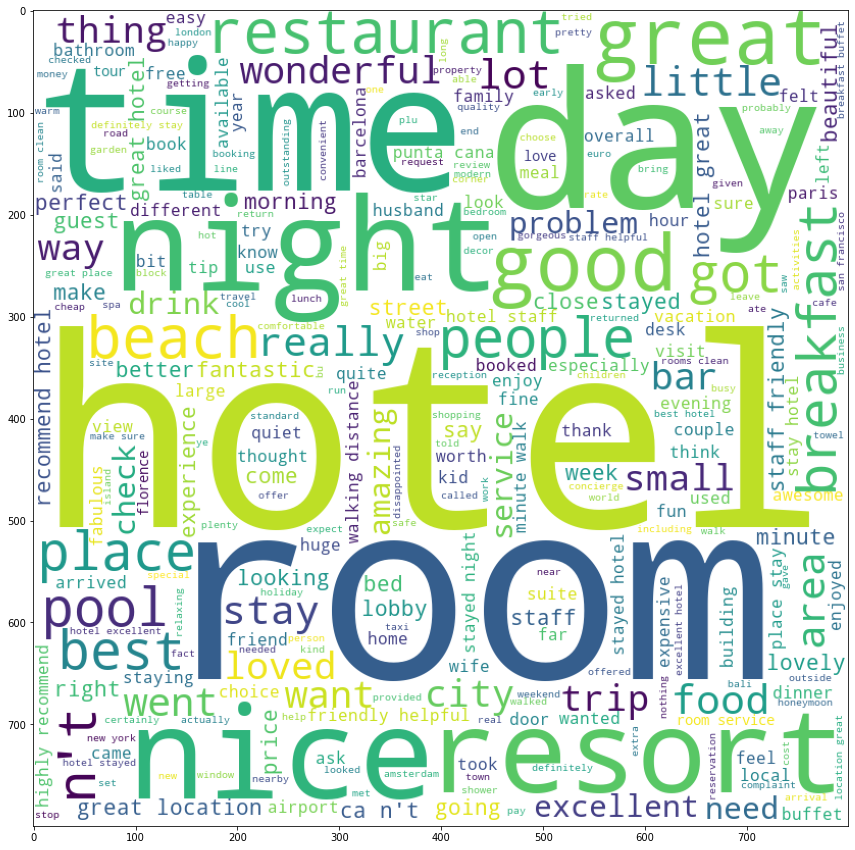

In [ ]:
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df5['Review']))

plt.imshow(wc1)

In [ ]:
df4=data[data['Rating']==4]
df4

,Review,Rating,Lenght
0,nice hotel expensive parking got good deal sta...,4.0,593
7,"excellent staff, housekeeping quality hotel ch...",4.0,597
11,nice value seattle stayed 4 nights late 2007. ...,4.0,364
12,nice hotel good location hotel kimpton design ...,4.0,569
14,"great hotel night quick business trip, loved l...",4.0,202
...,...,...,...
20475,good stay spent night pacific northwest/northe...,4.0,441
20477,nice hotel pioneer square area stayed late aug...,4.0,454
20478,"just fine, hotel located pioneer square just q...",4.0,727
20483,good bed clean convenient just night happy sta...,4.0,420


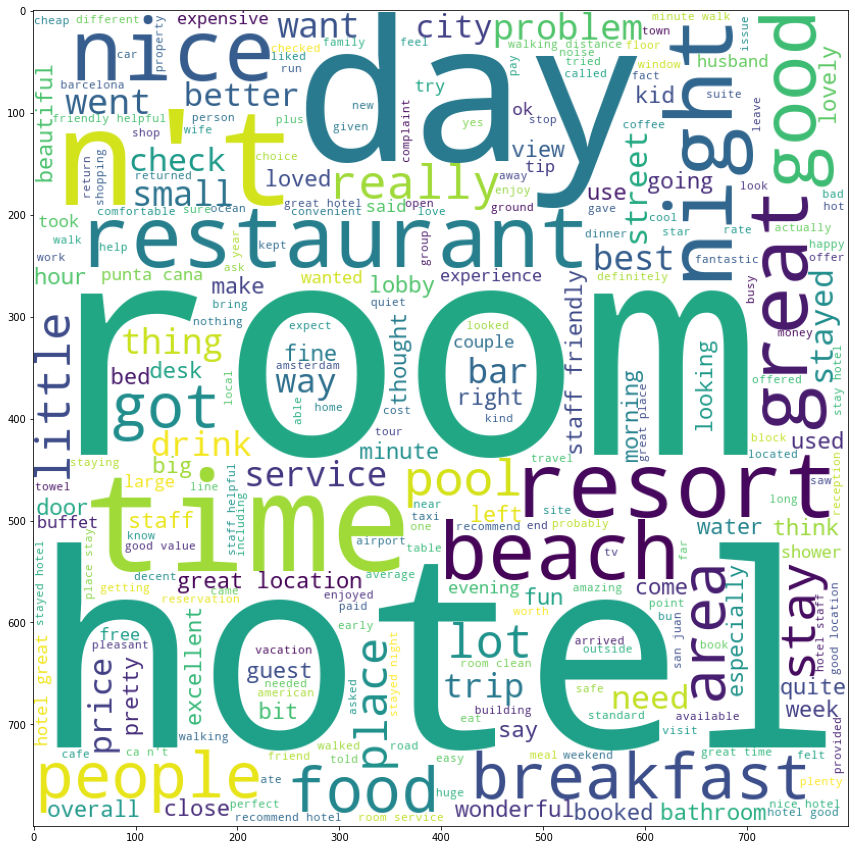

In [ ]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df4['Review']))

plt.imshow(wc2)

In [ ]:
df3=data[data['Rating']==3]
df3

,Review,Rating,Lenght
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427
13,nice hotel not nice staff hotel lovely staff q...,3.0,417
19,hmmmmm say really high hopes hotel monaco chos...,3.0,1025
25,"n't mind noise place great, read reviews noise...",3.0,482
27,met expectations centrally located hotel block...,3.0,538
...,...,...,...
20406,good good great location new clean modern bath...,3.0,376
20408,"ok ok. room clean tidy, staff friendly, good h...",3.0,165
20419,"nice try stayed hotel day grand opening, booke...",3.0,699
20446,"ok short stay booked hotel night stopover, sin...",3.0,566


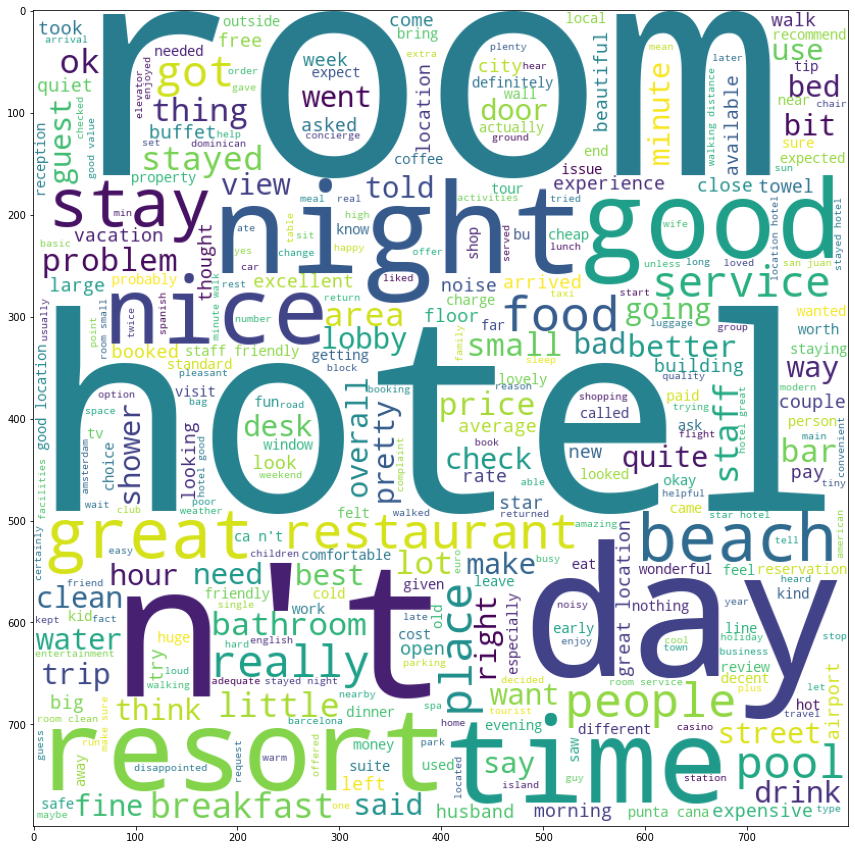

In [ ]:
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df3['Review']))

plt.imshow(wc3)

In [ ]:
df2=data[data['Rating']==2]
df2

,Review,Rating,Lenght
1,ok nothing special charge diamond member hilto...,2.0,1689
10,"poor value stayed monaco seattle july, nice ho...",2.0,333
16,disappointed say anticipating stay hotel monac...,2.0,1662
24,great location need internally upgrade advanta...,2.0,250
33,good location poor cleanliness warwick hotel g...,2.0,576
...,...,...,...
20481,ok price look hotel ok little run average clea...,2.0,247
20484,deceptive staff deceptive desk staff claiming ...,2.0,695
20485,not impressed unfriendly staff checked asked h...,2.0,616
20488,"ok just looks nice modern outside, desk staff ...",2.0,443


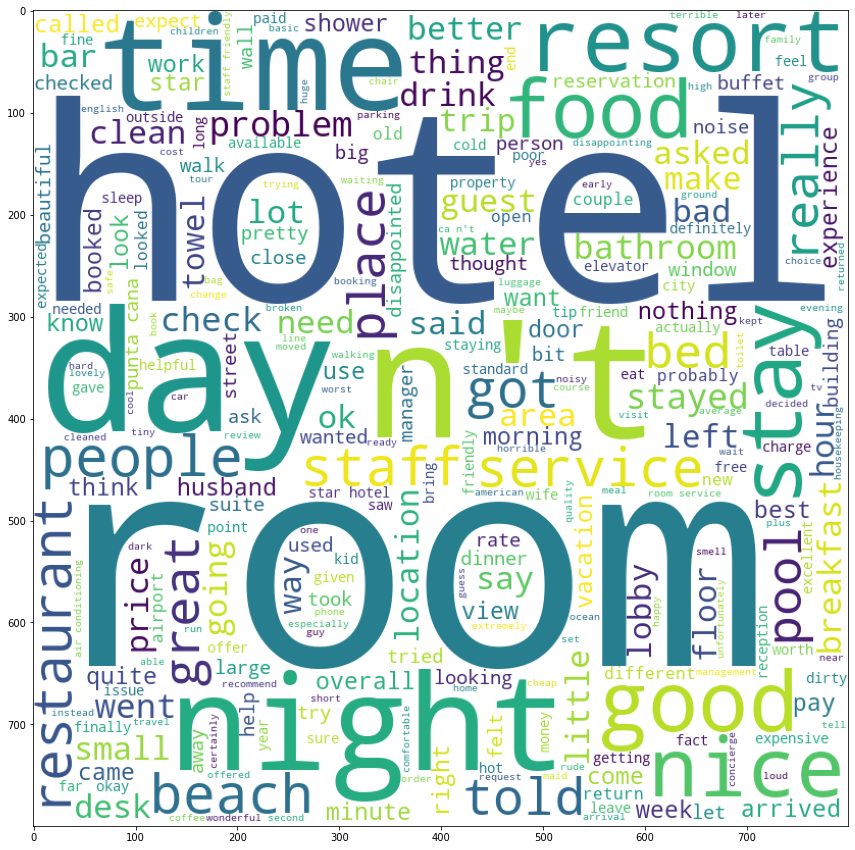

In [ ]:
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df2['Review']))

plt.imshow(wc4)

In [ ]:
df1=data[data['Rating']==1]
df1

,Review,Rating,Lenght
15,horrible customer service hotel stay february ...,1.0,1411
32,"noise airconditioner-a standard, arranged stay...",1.0,614
40,"bad choice, booked hotel hot wire called immed...",1.0,861
65,"hated inn terrible, room-service horrible staf...",1.0,133
69,ace grunge lives does mold mildew tiny bed met...,1.0,84
...,...,...,...
20421,worst sleep hip tooooo hip nite club building ...,1.0,342
20460,"june 08 stay stayed hotel june 6/6-6/8/08, rea...",1.0,682
20465,not stay hotel brought group february worst ho...,1.0,305
20467,returning la concha nightmare surprising hotel...,1.0,460


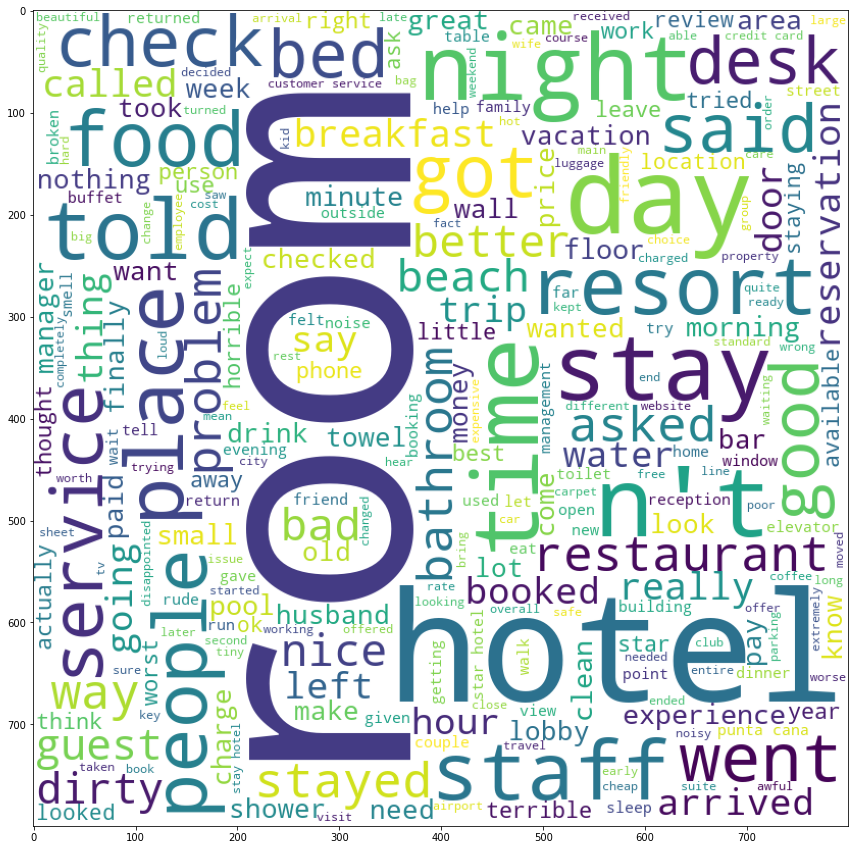

In [ ]:
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df1['Review']))

plt.imshow(wc5)

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:
quo=data.iloc[0,0]
quo

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [19]:
quo=re.sub('[^a-zA-Z0-9]',' ',quo)
quo=quo.lower().split()
quo

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
sw=set(stopwords.words('english'))
print(sw)

{'can', "isn't", "shouldn't", 'very', 'having', 'own', "wouldn't", 'this', 'only', 'she', 'needn', "couldn't", "should've", 'being', 'how', 'than', 'been', 'ma', 'during', 'why', 'out', "weren't", 'should', 'their', 'for', 'from', "hasn't", 'most', 'so', 'no', 'with', 'under', 'more', 'hadn', 'weren', 'all', 'yours', "mustn't", "that'll", 'ain', 'is', 'couldn', "it's", 'same', 'where', 'my', 'other', 'not', 'isn', 'does', 'as', 'nor', 'was', 've', 'in', 'any', "didn't", 'wasn', 'wouldn', 'to', 'some', "you've", 'further', "mightn't", 'mustn', 'because', 'down', 'aren', 'are', 'do', 'before', 'an', 'has', 'a', 'theirs', 'y', 'you', 'again', 'few', 'mightn', "hadn't", 'there', 'when', 'each', 'its', 'me', 'haven', 'both', 't', 'what', "shan't", 'am', 'but', 'your', 'against', 'such', 'we', 'of', 'ourselves', 'whom', 'that', 'd', "haven't", "won't", 'while', 'about', "doesn't", 'the', 'who', "you'd", 'will', 'which', 'have', 'if', 'be', "you're", 'hers', "don't", "you'll", 'now', 're', 'o

In [22]:
clean_word=[i for i in quo if not i in sw]
clean_word

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [23]:
sen=' '.join(clean_word)
sen

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [24]:
def text_preprocessing(quo):
  quo=re.sub('[^a-zA-Z]',' ',quo)
  quo=quo.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in quo if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [25]:
data['clean_word']=data["Review"].apply(text_preprocessing)
data.head()

,Review,Rating,Lenght,clean_word
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2.0,1689,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...


In [26]:
data['Length 2'] = data['clean_word'].apply(len)
data.head()

,Review,Rating,Lenght,clean_word,Length 2
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481
1,ok nothing special charge diamond member hilto...,2.0,1689,ok noth special charg diamond member hilton de...,1407
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice room experi hotel monaco seattl good hote...,1174
3,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058


In [27]:
data.describe()

,Rating,Lenght,Length 2
count,20491.000000,20491.000000,20491.000000
mean,3.952223,725.245571,597.989947
std,1.233030,689.933070,564.575886
min,1.000000,44.000000,31.000000
25%,3.000000,339.000000,282.000000
50%,4.000000,537.000000,444.000000
75%,5.000000,859.000000,709.000000
max,5.000000,13501.000000,11189.000000


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [29]:
cv=CountVectorizer()
x=cv.fit_transform(data["clean_word"]).toarray()
y=data["Rating"]

In [30]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
y

0        4.0
1        2.0
2        3.0
3        5.0
4        5.0
        ... 
20486    5.0
20487    4.0
20488    2.0
20489    1.0
20490    2.0
Name: Rating, Length: 20491, dtype: float64

In [32]:
{x.shape,y.shape}

{(20491,), (20491, 35692)}

In [33]:
from sklearn.metrics import classification_report

In [34]:
from sklearn import svm

In [35]:
df=pd.read_excel('hotel_reviews.xlsx')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [36]:
df_neg=df.loc[df['Rating']<3]
df_neg=df_neg.reset_index(drop=True)
df_neg

,Review,Rating
0,ok nothing special charge diamond member hilto...,2.0
1,"poor value stayed monaco seattle july, nice ho...",2.0
2,horrible customer service hotel stay february ...,1.0
3,disappointed say anticipating stay hotel monac...,2.0
4,great location need internally upgrade advanta...,2.0
...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2.0
3210,not impressed unfriendly staff checked asked h...,2.0
3211,"ok just looks nice modern outside, desk staff ...",2.0
3212,hotel theft ruined vacation hotel opened sept ...,1.0


In [37]:
df_neu=df.loc[df['Rating']==3]
df_neu=df_neu.reset_index(drop=True)
df_neu

,Review,Rating
0,nice rooms not 4* experience hotel monaco seat...,3.0
1,nice hotel not nice staff hotel lovely staff q...,3.0
2,hmmmmm say really high hopes hotel monaco chos...,3.0
3,"n't mind noise place great, read reviews noise...",3.0
4,met expectations centrally located hotel block...,3.0
...,...,...
2179,good good great location new clean modern bath...,3.0
2180,"ok ok. room clean tidy, staff friendly, good h...",3.0
2181,"nice try stayed hotel day grand opening, booke...",3.0
2182,"ok short stay booked hotel night stopover, sin...",3.0


In [38]:
df_pos=df.loc[df['Rating']>3]
df_pos=df_pos.reset_index(drop=True)
df_pos

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,"unique, great stay, wonderful time hotel monac...",5.0
2,"great stay great stay, went seahawk game aweso...",5.0
3,love monaco staff husband stayed hotel crazy w...,5.0
4,"cozy stay rainy city, husband spent 7 nights m...",5.0
...,...,...
15088,great play stay stay loyal inn package deal ha...,5.0
15089,great choice wife chose best western quite bit...,5.0
15090,good bed clean convenient just night happy sta...,4.0
15091,"best kept secret 3rd time staying charm, not 5...",5.0


In [39]:
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [40]:
df['Emotion']=df['Rating'].apply(rating)
df

,Review,Rating,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,Positive
1,ok nothing special charge diamond member hilto...,2.0,Negative
2,nice rooms not 4* experience hotel monaco seat...,3.0,Neutral
3,"unique, great stay, wonderful time hotel monac...",5.0,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,Positive
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,Positive
20487,great location price view hotel great quick pl...,4.0,Positive
20488,"ok just looks nice modern outside, desk staff ...",2.0,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,Negative


In [41]:
df['Emotion'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Emotion, dtype: int64

In [42]:
data1=data.copy()

In [43]:
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [44]:
data['Emotion']=data['Rating'].apply(rating)
data

,Review,Rating,Lenght,clean_word,Length 2,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481,Positive
1,ok nothing special charge diamond member hilto...,2.0,1689,ok noth special charg diamond member hilton de...,1407,Negative
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice room experi hotel monaco seattl good hote...,1174,Neutral
3,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,best kept secret rd time stay charm star ca n ...,621,Positive
20487,great location price view hotel great quick pl...,4.0,306,great locat price view hotel great quick place...,274,Positive
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok look nice modern outsid desk staff n partic...,371,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruin vacat hotel open sept guest w...,4583,Negative


In [45]:
datapos=data.loc[data['Rating']>3]
datapos=datapos.reset_index(drop=True)
datapos

,Review,Rating,Lenght,clean_word,Length 2,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stay hotel crazi wee...,821,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozi stay raini citi husband spent night monac...,602,Positive
...,...,...,...,...,...,...
15088,great play stay stay loyal inn package deal ha...,5.0,256,great play stay stay loyal inn packag deal haw...,216,Positive
15089,great choice wife chose best western quite bit...,5.0,716,great choic wife chose best western quit bit r...,621,Positive
15090,good bed clean convenient just night happy sta...,4.0,420,good bed clean conveni night happi stay hotel ...,339,Positive
15091,"best kept secret 3rd time staying charm, not 5...",5.0,733,best kept secret rd time stay charm star ca n ...,621,Positive


In [46]:
add=data[ (data['Emotion'] == 'Positive') ].index
data.drop(add,inplace=True)
data.reset_index()
data

,Review,Rating,Lenght,clean_word,Length 2,Emotion
1,ok nothing special charge diamond member hilto...,2.0,1689,ok noth special charg diamond member hilton de...,1407,Negative
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice room experi hotel monaco seattl good hote...,1174,Neutral
10,"poor value stayed monaco seattle july, nice ho...",2.0,333,poor valu stay monaco seattl juli nice hotel p...,259,Negative
13,nice hotel not nice staff hotel lovely staff q...,3.0,417,nice hotel nice staff hotel love staff quit ru...,344,Neutral
15,horrible customer service hotel stay february ...,1.0,1411,horribl custom servic hotel stay februari rd t...,1172,Negative
...,...,...,...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2.0,695,decept staff decept desk staff claim park stre...,570,Negative
20485,not impressed unfriendly staff checked asked h...,2.0,616,impress unfriendli staff check ask higher floo...,537,Negative
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok look nice modern outsid desk staff n partic...,371,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruin vacat hotel open sept guest w...,4583,Negative


In [47]:
df_posi=datapos.loc[:len(df_neg)]
df_posi

,Review,Rating,Lenght,clean_word,Length 2,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stay hotel crazi wee...,821,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozi stay raini citi husband spent night monac...,602,Positive
...,...,...,...,...,...,...
3210,"amazing, brother stayed march, hotel caruso ra...",5.0,313,amaz brother stay march hotel caruso ravelo be...,263,Positive
3211,really fantastic hotel stayed early feb 06 bus...,5.0,313,realli fantast hotel stay earli feb busi trip ...,248,Positive
3212,luxury overlooking mediterranean just returned...,5.0,352,luxuri overlook mediterranean return night sta...,293,Positive
3213,"loved arts great service arts, just came 3 nig...",5.0,234,love art great servic art came night stay beau...,187,Positive


In [48]:
df_all=pd.concat([df_posi,data],axis=0)
df_all

,Review,Rating,Lenght,clean_word,Length 2,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stay hotel crazi wee...,821,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozi stay raini citi husband spent night monac...,602,Positive
...,...,...,...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2.0,695,decept staff decept desk staff claim park stre...,570,Negative
20485,not impressed unfriendly staff checked asked h...,2.0,616,impress unfriendli staff check ask higher floo...,537,Negative
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok look nice modern outsid desk staff n partic...,371,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruin vacat hotel open sept guest w...,4583,Negative


In [49]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer

In [50]:
lemmatizer = WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [51]:
def lemmatize(txt):
  """
  This function takes text string as input lemmatize it to its root/base/stem word.
  """
  list_review=[lemmatizer.lemmatize(word=word, pos=tag[0].lower()) if tag[0].lower() in ['a','r','n','v'] else word for word, tag in pos_tag(w_tokenizer.tokenize(txt))]
  return (' '.join([x for x in list_review if x]))

In [52]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_gr

True

In [53]:
df_all['Lemmatized_Review']=df_all['clean_word'].apply(lambda x: lemmatize(x))

In [54]:
df_all

,Review,Rating,Lenght,clean_word,Length 2,Emotion,Lemmatized_Review
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481,Positive,nice hotel expens park get good deal stay hote...
1,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506,Positive,uniqu great stay wonder time hotel monaco loca...
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058,Positive,great stay great stay go seahawk game awesom d...
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stay hotel crazi wee...,821,Positive,love monaco staff husband stay hotel crazi wee...
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozi stay raini citi husband spent night monac...,602,Positive,cozi stay raini citi husband spend night monac...
...,...,...,...,...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2.0,695,decept staff decept desk staff claim park stre...,570,Negative,decept staff decept desk staff claim park stre...
20485,not impressed unfriendly staff checked asked h...,2.0,616,impress unfriendli staff check ask higher floo...,537,Negative,impress unfriendli staff check ask higher floo...
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok look nice modern outsid desk staff n partic...,371,Negative,ok look nice modern outsid desk staff n partic...
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruin vacat hotel open sept guest w...,4583,Negative,hotel theft ruin vacat hotel open sept guest w...


In [55]:
df_all['Length 3'] = df_all['Lemmatized_Review'].apply(len)
df_all.head()

,Review,Rating,Lenght,clean_word,Length 2,Emotion,Lemmatized_Review,Length 3
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expens park got good deal stay hote...,481,Positive,nice hotel expens park get good deal stay hote...,480
1,"unique, great stay, wonderful time hotel monac...",5.0,600,uniqu great stay wonder time hotel monaco loca...,506,Positive,uniqu great stay wonder time hotel monaco loca...,504
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1058,Positive,great stay great stay go seahawk game awesom d...,1053
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stay hotel crazi wee...,821,Positive,love monaco staff husband stay hotel crazi wee...,816
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozi stay raini citi husband spent night monac...,602,Positive,cozi stay raini citi husband spend night monac...,602


In [56]:
df_all.describe()

,Rating,Lenght,Length 2,Length 3
count,8613.000000,8613.000000,8613.000000,8613.000000
mean,3.050853,788.328109,645.745501,643.610124
std,1.373380,731.632145,595.976197,593.638523
min,1.000000,44.000000,31.000000,31.000000
25%,2.000000,365.000000,302.000000,302.000000
50%,3.000000,585.000000,480.000000,478.000000
75%,4.000000,944.000000,773.000000,771.000000
max,5.000000,13501.000000,11189.000000,11142.000000


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(df_all.Review,df_all.Emotion)

In [58]:
X_train_vec=cv.fit_transform(X_train)
X_test_vec=cv.transform(X_test)

In [ ]:
#SVM CLassifier

In [59]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train_vec,Y_train)

SVC(kernel='linear')

In [61]:
predd=clf.predict(X_test_vec)
predd

array(['Negative', 'Neutral', 'Negative', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [62]:
print(classification_report(predd,Y_test))

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       832
     Neutral       0.51      0.51      0.51       529
    Positive       0.81      0.85      0.83       793

    accuracy                           0.72      2154
   macro avg       0.70      0.70      0.70      2154
weighted avg       0.72      0.72      0.72      2154



In [74]:
rev=['the ambience was poor']
rev_vec=cv.transform(rev)
clf.predict(rev_vec)

array(['Negative'], dtype=object)

In [69]:
df_all['Emotion'].value_counts()

Positive    3215
Negative    3214
Neutral     2184
Name: Emotion, dtype: int64

In [70]:
#Multinomial NB Classifier

In [71]:
model=MultinomialNB()
model.fit(X_train_vec,Y_train)

MultinomialNB()

In [72]:
pred=model.predict(X_test_vec)
pred

array(['Negative', 'Neutral', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype='<U8')

In [75]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80       826
     Neutral       0.48      0.60      0.54       425
    Positive       0.89      0.82      0.86       903

    accuracy                           0.77      2154
   macro avg       0.73      0.74      0.73      2154
weighted avg       0.79      0.77      0.77      2154



In [97]:
op=['the weather was decent']
op_vec=cv.transform(op)
model.predict(op_vec)

array(['Neutral'], dtype='<U8')

In [80]:
#XGBoost Classifier

In [81]:
model1=XGBClassifier()
model1.fit(X_train_vec,Y_train)

XGBClassifier(objective='multi:softprob')

In [82]:
pred1=model1.predict(X_test_vec)
pred1

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

In [83]:
print(classification_report(pred1,Y_test))

              precision    recall  f1-score   support

    Negative       0.82      0.71      0.76       916
     Neutral       0.35      0.56      0.43       332
    Positive       0.83      0.76      0.79       906

    accuracy                           0.71      2154
   macro avg       0.67      0.68      0.66      2154
weighted avg       0.75      0.71      0.72      2154



In [ ]:
#Decision Tree Classifier

In [84]:
model2=DecisionTreeClassifier()
model2.fit(X_train_vec,Y_train)

DecisionTreeClassifier()

In [85]:
pred2=model2.predict(X_test_vec)
pred2

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Neutral',
       'Positive'], dtype=object)

In [86]:
print(classification_report(pred2,Y_test))

              precision    recall  f1-score   support

    Negative       0.61      0.61      0.61       790
     Neutral       0.36      0.36      0.36       544
    Positive       0.66      0.66      0.66       820

    accuracy                           0.57      2154
   macro avg       0.54      0.55      0.55      2154
weighted avg       0.57      0.57      0.57      2154



In [ ]:
#Random Forest Classifier

In [87]:
model3=RandomForestClassifier()
model3.fit(X_train_vec,Y_train)

RandomForestClassifier()

In [88]:
pred3=model3.predict(X_test_vec)
pred3

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

In [89]:
print(classification_report(pred3,Y_test))

              precision    recall  f1-score   support

    Negative       0.89      0.70      0.78       997
     Neutral       0.18      0.66      0.29       149
    Positive       0.89      0.74      0.81      1008

    accuracy                           0.71      2154
   macro avg       0.65      0.70      0.63      2154
weighted avg       0.84      0.71      0.76      2154



In [ ]:
#Ada Boost Classifier

In [90]:
model4=AdaBoostClassifier()
model4.fit(X_train_vec,Y_train)

AdaBoostClassifier()

In [91]:
pred4=model4.predict(X_test_vec)
pred4

array(['Positive', 'Negative', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

In [92]:
print(classification_report(pred4,Y_test))

              precision    recall  f1-score   support

    Negative       0.81      0.72      0.76       890
     Neutral       0.37      0.51      0.43       394
    Positive       0.80      0.77      0.78       870

    accuracy                           0.70      2154
   macro avg       0.66      0.66      0.66      2154
weighted avg       0.73      0.70      0.71      2154



In [ ]:
#Logistic Regression

In [93]:
model5=LogisticRegression()
model5.fit(X_train_vec,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [94]:
pred5=model5.predict(X_test_vec)
pred5

array(['Negative', 'Neutral', 'Negative', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [95]:
print(classification_report(pred5,Y_test))

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       809
     Neutral       0.51      0.53      0.52       518
    Positive       0.84      0.84      0.84       827

    accuracy                           0.74      2154
   macro avg       0.71      0.71      0.71      2154
weighted avg       0.74      0.74      0.74      2154



In [ ]:
op=['the airconditioner malfunctioned']
op_vec=cv.transform(op)
model.predict(op_vec)

array(['Negative'], dtype='<U8')